# Mnist 手写数字识别

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

print(tf.__version__)

2.7.0


In [2]:
# 获取 Mints手写数字数据集
mnist = keras.datasets.mnist

# 训练数据，测试数据
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# train_images：6万行测试数据，每一项数据为28 * 28的训练数据（本质是图片），train_labels：标签为6万行的标量
print("Train image shape: ", train_images.shape, "Train label shape: ", train_labels.shape)

# test_images：1万行测试数据，每一项数据为28 * 28的训练数据（本质是图片），test_labels：标签为1万行的标量
print("Test image shape: ", test_images.shape, "Test label shape: ", test_labels.shape)

Train image shape:  (60000, 28, 28) Train label shape:  (60000,)
Test image shape:  (10000, 28, 28) Test label shape:  (10000,)


In [4]:
# 查看一副image的数据
print("image_data: ", train_images[1])

image_data:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 2

In [5]:
print("image_label: ", train_labels[1])

image_label:  0


In [6]:
type(train_images[1, 1, 1])

numpy.uint8

In [7]:
# 可视化image
def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap="binary")
    plt.show()

plt.imshow()第二个参数为图像的模式参数，“binary”表示以灰度模式显示。

plt.imshow()中的数据参数支持以下数据形式：
+ (M, N)：二维数值，代表图像大小为M行N列，值为每个像素点的取值。
+ (M, N, 3)：三维度数值，代表大小为M行N列（即图片的高和宽），每个像素点的值具有RGB三个通道的值（float或unit8）。
+ 参数cmap缺省值为none，将把图像数据映射为彩色图显示。

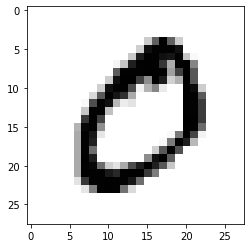

In [8]:
plot_image(train_images[1])

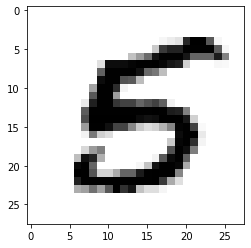

In [9]:
plot_image(train_images[20000])

In [10]:
train_labels[20000]

5

## 进一步了解reshape()

In [11]:
int_array = np.array([i for i in range(64)])

print(int_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [12]:
# 转换成8行8列（8 * 8）的数组
int_array.reshape(8, 8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [13]:
# 转换成4行16列（4 * 16）的数组
int_array.reshape(4, 16)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]])

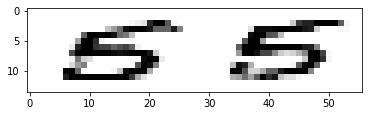

In [14]:
plt.imshow(train_images[20000].reshape(14, 56), cmap="binary")
plt.show()

## 划分验证集

In [15]:
# 训练集总数，以次数据为准将训练集划分为训练集与验证集
total_num = len(train_images)

# 验证集占训练集的比例
valid_split = 0.2

# 实际训练集数量
train_num = int(total_num * (1 - valid_split))

# 训练集（0% ~ 80%）
train_x = train_images[:train_num]
train_y = train_labels[:train_num]

# 剩余部分为验证集（80% ~ 100%）
valid_x = train_images[train_num:]
valid_y = train_labels[train_num:]

test_x = test_images
test_y = test_labels

In [16]:
valid_x.shape

(12000, 28, 28)

In [17]:
# 把（28，28）的结构拉直为 1行 784列
# -1代表由系统计算行数，指定列数为784列
train_x = train_x.reshape(-1, 784)
valid_x = valid_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

## 特征数据归一化

In [18]:
train_x = tf.cast(train_x / 255.0, tf.float32)
valid_x = tf.cast(valid_x / 255.0, tf.float32)
test_x = tf.cast(test_x / 255.0, tf.float32)

In [19]:
train_x[1]

<tf.Tensor: shape=(784,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.     

## 独热编码

In [20]:
# 举例
x_study = [3, 4]
tf.one_hot(x_study, depth=10)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [21]:
# 对标签数据进行独热编码
train_y = tf.one_hot(train_y, depth=10)
valid_y = tf.one_hot(valid_y, depth=10)
test_y = tf.one_hot(test_y, depth=10)

In [22]:
train_y

<tf.Tensor: shape=(48000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>

## 模型定义

In [23]:
# 扩展多分类模型
# 模型计算后进行Softmax分类，决定属于哪个标签分类（本例为10分类）
def model(x, w, b):
    pred = tf.matmul(x, w) + b

    # 返回预测标签值
    return tf.nn.softmax(pred)

## 创建变量

In [24]:
# 正态分布随机数权重W
W = tf.Variable(tf.random.normal([784, 10], mean=0.0, stddev=1.0, dtype=tf.float32))

# 以常数０初始化偏置项Ｂ
B = tf.Variable(tf.zeros([10]), dtype=tf.float32)

## 定义交叉熵函数

In [25]:
# 定义交叉熵损失函数
def loss(x, y, w, b):
    # 前向计算
    pred = model(x, w, b)

    # 计算模型预测值与真实值差异
    loss_ = tf.keras.losses.categorical_crossentropy(y_true=y, y_pred=pred)

    # 求均方差
    return tf.reduce_mean(loss_)

## 设置训练参数

In [26]:
train_epochs = 20
batch_size = 50
learning_rate = 0.001

## 定义梯度计算函数

In [27]:
# 计算样本数据[x, y]在参数[w, b]上的梯度
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)

    # 返回梯度向量
    return tape.gradient(loss_, [w, b])

## 选择优化器

In [28]:
# Adam优化器
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

## 定义准确率

In [29]:
def accuracy(x, y, w, b):
    # 计算模型预测标签值与标签值的差异
    pred = model(x, w, b)

    # 检查预测类别tf.argmax(pred, 1)与实际类别tf.argmax(y, 1)的匹配情况
    # 匹配成功返回 True
    # 匹配失败返回 False
    correct_predication = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

    # 将匹配结果转换为float32输出，得出准确率
    return tf.reduce_mean(tf.cast(correct_predication, tf.float32))

## 模型训练

In [30]:
total_step = int(train_num / batch_size)

loss_list_train = []
loss_list_valid = []
acc_list_train = []
acc_list_valid = []

for epoch in range(train_epochs):
    for step in range(total_step):
        xs = train_x[step * batch_size:(step + 1) * batch_size]
        ys = train_y[step * batch_size:(step + 1) * batch_size]

        grads = grad(xs, ys, W, B)
        optimizer.apply_gradients(zip(grads, [W, B]))

    loss_train = loss(train_x, train_y, W, B).numpy()
    loss_valid = loss(valid_x, valid_y, W, B).numpy()
    acc_train = accuracy(train_x, train_y, W, B).numpy()
    acc_valid = accuracy(valid_x, valid_y, W, B).numpy()

    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)

    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)

    print("Epoch = {:3d}, "
          "Train_loss = {:.4f},"
          " Train_acc = {:4f},"
          " Val_loss = {:.4f}, "
          "Val_acc = {:.4f}".format(epoch + 1,
                                    loss_train,
                                    loss_valid,
                                    acc_train,
                                    acc_valid))

Epoch =   1, Train_loss = 1.8158, Train_acc = 1.704360, Val_loss = 0.6590, Val_acc = 0.6770
Epoch =   2, Train_loss = 1.0539, Train_acc = 0.969915, Val_loss = 0.7847, Val_acc = 0.7969
Epoch =   3, Train_loss = 0.8090, Train_acc = 0.749454, Val_loss = 0.8286, Val_acc = 0.8407
Epoch =   4, Train_loss = 0.6843, Train_acc = 0.643826, Val_loss = 0.8528, Val_acc = 0.8621
Epoch =   5, Train_loss = 0.6077, Train_acc = 0.580712, Val_loss = 0.8676, Val_acc = 0.8765
Epoch =   6, Train_loss = 0.5542, Train_acc = 0.536996, Val_loss = 0.8771, Val_acc = 0.8845
Epoch =   7, Train_loss = 0.5144, Train_acc = 0.505030, Val_loss = 0.8832, Val_acc = 0.8903
Epoch =   8, Train_loss = 0.4834, Train_acc = 0.479997, Val_loss = 0.8881, Val_acc = 0.8940
Epoch =   9, Train_loss = 0.4585, Train_acc = 0.460097, Val_loss = 0.8929, Val_acc = 0.8978
Epoch =  10, Train_loss = 0.4380, Train_acc = 0.443988, Val_loss = 0.8962, Val_acc = 0.9002
Epoch =  11, Train_loss = 0.4208, Train_acc = 0.430600, Val_loss = 0.8994, Val_a

## 显示损失图像

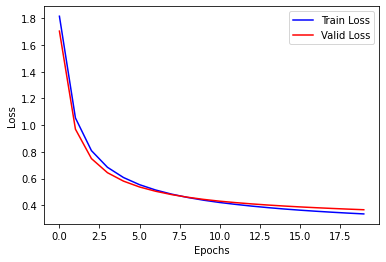

In [31]:
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.plot(loss_list_train, "blue", label="Train Loss")
plt.plot(loss_list_valid, "red", label="Valid Loss")

plt.legend(loc=1)

## 显示准确率图像

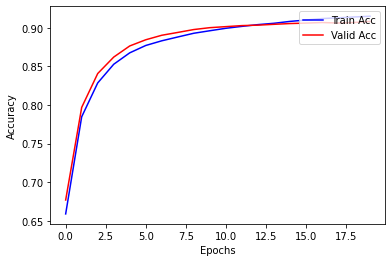

In [32]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.plot(acc_list_train, "blue", label="Train Acc")
plt.plot(acc_list_valid, "red", label="Valid Acc")

plt.legend(loc=1)

## 评估模型

In [34]:
# 完成训练后，在测试集中评估模型
acc_test = accuracy(test_x, test_y, W, B).numpy()

print("Test accuracy: ", acc_test)

Test accuracy:  0.9083


## 模型预测

In [36]:
# 定义预测函数
def predict(x, w, b):
    # 计算模型预测值
    pred = model(x, w, b)
    result = tf.argmax(pred, 1).numpy()

    return result

In [37]:
pred_test = predict(test_x, W, B)

In [38]:
pred_test[0]

7

## 模型可视化

In [39]:
# 定义可视化函数
def plot_images_labels_prediction(
        images,  # 图像列表
        labels,  # 标签列表
        prediction,  # 预测值列表（若传入空表则为展示数据集中image与对应标签）
        index=0,  # 从第index个开始显示
        num=10,  # 缺省一次显示10幅
):
    # 获取当前图表
    flg = plt.gcf()

    # 1英寸等于2.54cm
    flg.set_size_inches(10, 4)

    # 最多展示25个要处理的子图
    if num > 25:
        num = 25

    for i in range(0, num):
        # 获取当前要处理的子图
        ax = plt.subplot(5, 5, i + 1)

        # 显示第index个图像
        ax.imshow(np.reshape(images[index], (28, 28), ), cmap="binary")

        # 构建该图上要显示的title信息
        title = "Label = " + str(np.argmax(labels[index]))

        if len(prediction) > 0:
            title += ", Pred = " + str(prediction[index])

        ax.set_title(title, fontsize=10)

        index += 1

    plt.show()

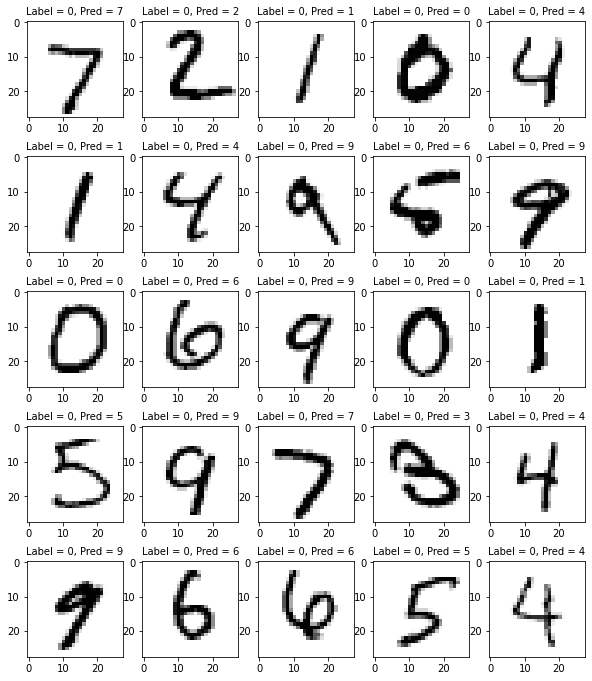

In [41]:
plot_images_labels_prediction(
    test_images,
    test_labels,
    pred_test,
    0,
    25
)